# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to discretize a simple climate model and use it
    to simulate global mean temperatures under a future emissions
    scenario.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

In [1]:
using Plots
using LaTeXStrings
using CSV
using DataFrames

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
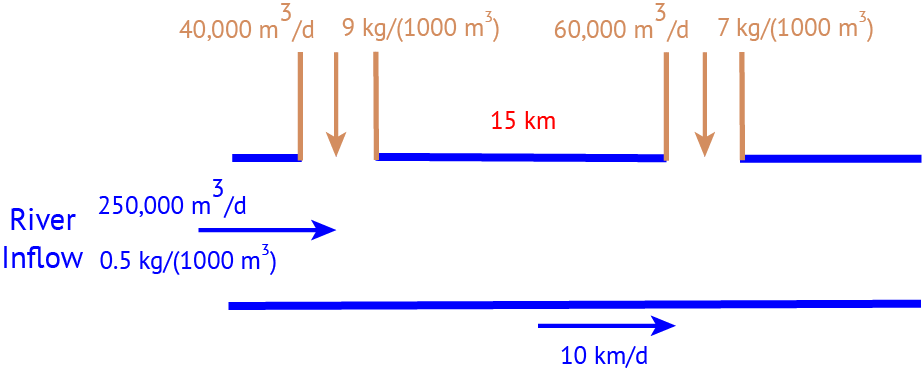
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

> **Tip**
>
> Your solution will need to be in terms of distance downriver.

### Problem 2 (25 points)

The simplest climate model involves capturing changes to the Earth’s
energy budget (it is commonly called the *energy balance model*, or
EBM). These changes are also called *radiative forcings* (RF), and can
result from several causes, including greenhouse gas emissions, volcanic
eruptions, and changes to the solar cycle. The EBM treats the Earth as a
0-dimensional sphere covered with water, which absorbs heat in response
to radiative forcings. Chanwith global temperature changes resulting
from imbalances in the average (over the entire surface area) heat flux.

The EBM equations are:

$$
\begin{align*}
\overbrace{\frac{dH}{dt}}^{\text{change in heat}} &= \overbrace{F}^{\substack{\text{radiative} \\ \text{forcing}}} - \overbrace{\lambda T}^{\substack{\text{change in} \\ \text{temperature}}} \\
\underbrace{C}_{\substack{\text{ocean heat} \\ \text{capacity}}} \frac{dT}{dt} &= F - \lambda T \\
c\underbrace{d}_{\substack{\text{ocean} \\ \text{mixing depth}}} \frac{dT}{dt} &= F - \lambda T,
\end{align*}
$$

where $c = 4.184\times 10^6 \mathrm{J/K/m}^2$ is the specific heat of
water per area, $d$ is the depth of the ocean mixed layer (we’ll assume
$d = 86 \mathrm{m}$), and $\lambda$ is the **climate feedback factor**
and controls how much the Earth warms in response to increased radiative
forcing (assume $\lambda = 2.1$). The total radiative forcing
$F = F_\text{non-aerosol} + \alpha F_\text{aerosol}$, where $\alpha$ is
an uncertain scaling factor reflecting aerosol-cloud feedbacks (we’ll
assume $\alpha = 0.8$).

The code below loads historical and projected radiative forcings (under
the SSP5-8.5 future emissions scenario, which is the most extreme of the
scenarios used to project climate change impacts) from
`data/ERF_ssp585_1750-2500.csv` into a `DataFrame` object and calculates
the non-aerosol and aerosol components of those forcings.

> **Tip**
>
> Look closely at and experiment with the code below: `DataFrames` are a
> common Julia datatype for tabular data, and you may work more with
> them later in the semester or beyond! They are broadly similar to
> `DataFrames` from `pandas` in Python.

In [1]:
# Dataset from https://zenodo.org/record/3973015
# The CSV is read into a DataFrame object, and we specify that it is comma delimited
forcings_all = CSV.read("data/ERF_ssp585_1750-2500.csv", DataFrame, delim=",")

# Separate out the individual components
# Get total aerosol forcings
forcing_aerosol_rad = forcings_all[!,"aerosol-radiation_interactions"]
forcing_aerosol_cloud = forcings_all[!,"aerosol-cloud_interactions"]
forcing_aerosol = forcing_aerosol_rad + forcing_aerosol_cloud
# Calculate non-aerosol forcings from the total.
forcing_total = forcings_all[!,"total"]
forcing_non_aerosol = forcing_total - forcing_aerosol

We can plot the aerosol and non-aerosol forcings below.

In [1]:
t = Int64.(forcings_all[!,"year"]) # Ensure that years are interpreted as integers
p_forcing = plot(; xlabel="Year", ylabel="Radiative Forcing (W/m²)")
plot!(p_forcing, t, forcing_aerosol, label="Aerosol Forcing", color=:blue, linewidth=2)
plot!(p_forcing, t, forcing_non_aerosol, label="Non-Aerosol Forcing", color=:red, linewidth=2)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip890)" d="M463.247 1782.41 Q459.914 1782.41 457.992 1784.19 Q456.094 1785.97 456.094 1789.1 Q456.094 1792.22 457.992 1794.01 Q459.914 1795.79 463.247 1795.79 Q466.58 1795.79 468.501 1794.01 Q470.423 1792.2 470.423 1789.1 Q470.423 1785.97 468.501 1784.19 Q466.603 1782.41 463.247 1782.41 M458.571 1780.42 Q455.562 1779.68 453.872 1777.62 Q452.205 1775.56 452.205 1772.59 Q452.205 1768.45 455.145 1766.04 Q458.108 1763.64 463.247 1763.64 Q468.409 1763.64 471.349 1766.04 Q474.288 1768.45 474.288 1772.59 Q474.288 1775.56 472.599 1777.62 Q470.932 1779.68 467.946 1780.42 Q471.326 1781.21 473.201 1783.5 Q475.099 1785.79 475.099 1789.1 Q475.099 1794.12 472.02 1796.81 Q468.964 1799.49 463.247 1799.49 Q457.529 1799.49 454.451 1796.81 Q451.395 1794.12 451.395 1789.1 Q451.395 1785.79 453.293 1783.5 Q455.191 1781.21 458.571 1780.42 M456.858 1773.03 Q456.858 1775.72 458.525 1777.22 Q460.214 1778.73 463.247 1778.73 Q466.256 1778.73 467.946 1777.22 Q469.659 1775.72 469.659 1773.03 Q469.659 1770.35 467.946 1768.84 Q466.256 1767.34 463.247 1767.34 Q460.214 1767.34 458.525 1768.84 Q456.858 1770.35 456.858 1773.03 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip890)" d="M493.409 1767.34 Q489.798 1767.34 487.969 1770.9 Q486.163 1774.45 486.163 1781.58 Q486.163 1788.68 487.969 1792.25 Q489.798 1795.79 493.409 1795.79 Q497.043 1795.79 498.849 1792.25 Q500.677 1788.68 500.677 1781.58 Q500.677 1774.45 498.849 1770.9 Q497.043 1767.34 493.409 1767.34 M493.409 1763.64 Q499.219 1763.64 502.274 1768.24 Q505.353 1772.83 505.353 1781.58 Q505.353 1790.3 502.274 1794.91 Q499.219 1799.49 493.409 1799.49 Q487.599 1799.49 484.52 1794.91 Q481.464 1790.3 481.464 1781.58 Q481.464 1772.83 484.52 1768.24 Q487.599 1763.64 493.409 1763.64 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip890)" d="M523.571 1767.34 Q519.96 1767.34 518.131 1770.9 Q516.325 1774.45 516.325 1781.58 Q516.325 1788.68 518.131 1792.25 Q519.96 1795.79 523.571 1795.79 Q527.205 1795.79 529.01 1792.25 Q530.839 1788.68 530.839 1781.58 Q530.839 1774.45 529.01 1770.9 Q527.205 1767.34 523.571 1767.34 M523.571 1763.64 Q529.381 1763.64 532.436 1768.24 Q535.515 1772.83 535.515 1781.58 Q535.515 1790.3 532.436 1794.91 Q529.381 1799.49 523.571 1799.49 Q517.76 1799.49 514.682 1794.91 Q511.626 1790.3 511.626 1781.58 Q511.626 1772.83 514.682 1768.24 Q517.76 1763.64 523.571 1763.64 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip890)" d="M1026.29 1794.89 L1042.61 1794.89 L1042.61 1798.82 L1020.66 1798.82 L1020.66 1794.89 Q1023.33 1792.13 1027.91 1787.5 Q1032.52 1782.85 1033.7 1781.51 Q1035.94 1778.98 1036.82 1777.25 Q1037.72 1775.49 1037.72 1773.8 Q1037.72 1771.04 1035.78 1769.31 Q1033.86 1767.57 1030.76 1767.57 Q1028.56 1767.57 1026.1 1768.34 Q1023.67 1769.1 1020.9 1770.65 L1020.9 1765.93 Q1023.72 1764.79 1026.17 1764.21 Q1028.63 1763.64 1030.66 1763.64 Q1036.03 1763.64 1039.23 1766.32 Q1042.42 1769.01 1042.42 1773.5 Q1042.42 1775.63 1041.61 1777.55 Q1040.83 1779.45 1038.72 1782.04 Q1038.14 1782.71 1035.04 1785.93 Q1031.94 1789.12 1026.29 1794.89 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip890)" d="M1062.42 1767.34 Q1058.81 1767.34 1056.98 1770.9 Q1055.18 1774.45 1055.18 1781.58 Q1055.18 1788.68 1056.98 1792.25 Q1058.81 1795.79 1062.42 1795.79 Q1066.06 1795.79 1067.86 1792.25 Q1069.69 1788.68 1069.69 1781.58 Q1069.69 1774.45 1067.86 1770.9 Q1066.06 1767.34 1062.42 1767.34 M1062.42 1763.64 Q1068.23 1763.64 1071.29 1768.24 Q1074.37 1772.83 1074.37 1781.58 Q1074.37 1790.3 1071.29 1794.91 Q1068.23 1799.49 1062.42 1799.49 Q1056.61 1799.49 1053.53 1794.91 Q1050.48 1790.3 1050.48 1781.58 Q1050.48 1772.83 1053.53 1768.24 Q1056.61 1763.64 1062.42 1763.64 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip890)" d="M1092.58 1767.34 Q1088.97

**In this problem**:

-   Discretize the EBM to produce a simulation model of global mean
    temperatures $T$ over time as a result of total radiative forcings
    $F$.
-   Simulate global mean temperature anomalies (in $^\circ C$ relative
    to 1750) from your model using the historical and SSP5-8.5 radiative
    forcing data. Use an annual time step for the simulation (in
    seconds: $\Delta t = 31,558,152 \mathrm{s}$). You can assume
    $T(0) = 0^\circ C$.
-   Plot your simulated global mean temperature anomalies from 1750
    through 2100.

### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

Consider the lake eutrophication example from [Lecture
04](https://viveks.me/environmental-systems-analysis/slides/lecture04-eutrophication-modeling.html#/title-slide).
Suppose that phosphorous is also atmospherically deposited onto the lake
surface at a rate of
$1.6 \times 10^{-4} \mathrm{kg/(yr} \cdot \mathrm{m}^2)$, which is then
instantly mixed into the lake. Derive a model for the lake phosphorous
concentration and find the maximum allowable point source phosphorous
loading if the goal is to keep lake concentrations below 0.02 mg/L.

## References

List any external references consulted, including classmates.